In [1]:
from commonfunctions import *
import cv2
import skimage.filters as filters
import scipy.ndimage as nd
%matplotlib inline
%load_ext autoreload
%autoreload 2

0.521484375


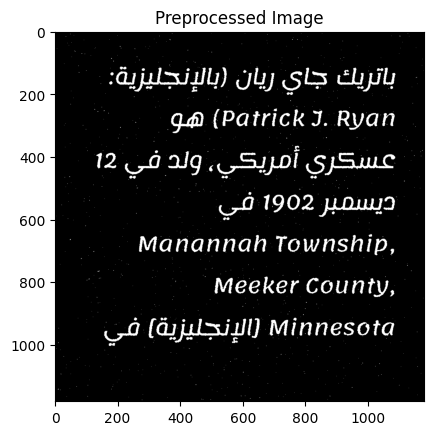

In [2]:
# Lemonada/189.jpeg is rotated 180 degrees
# Lemonada/457.jpeg has salt and pepper noise

img = io.imread('fonts-dataset/Lemonada/457.jpeg')
img = filters.median(img)
img = rgb2gray(img)
# Apply median filter to remove salt and pepper noise
# convert to binary image
thresh = filters.threshold_otsu(img)
print(thresh)
img = img < thresh
img = img.astype(int)
# get all non black Pixels
cntNotBlack = cv2.countNonZero(img)

# get pixel count of image
height, width = img.shape
cntPixels = height*width

# compute all black pixels
cntBlack = cntPixels - cntNotBlack
# Ensure the image is white text on Black background because black pixels should be more than white pixels
if cntBlack < cntNotBlack:
    img = cv2.bitwise_not(img)
show_images([img], ['Preprocessed Image'])

# Output the preprocessed image
# io.imsave('preprocessed.png', img)

#### Note to joseph: After analysis I found that the angle shifting falls only in one of these values [0, 45, 90, 135, 180] so I commented the np.arange line as it consumed ~10 seconds per image

Best angle: 0


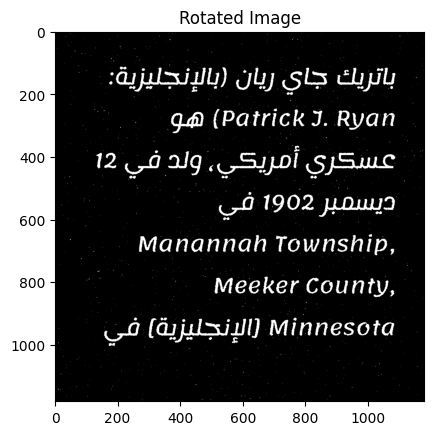

In [5]:
def find_score(arr, angle):
    data = nd.rotate(arr, angle, reshape=False, order=0)
    hist = np.sum(data, axis=1)
    # score is the sum of squares of differences of every two consecutive elements in the histogram (variance could also be used)
    score = np.sum((hist[1:] - hist[:-1]) ** 2)
    return hist, score


# angles = np.arange(0, 181, 1)

angles = [0, 45, 90, 135, 180] # TODO 180 might be removed later
scores = []

for angle in angles:
    hist, score = find_score(img, angle)
    # print('Angle: {}, Score: {}'.format(angle, score))
    scores.append(score)

best_score = max(scores)
best_angle = angles[scores.index(best_score)]
print('Best angle: {}'.format(best_angle)) # correct skew
rotated = nd.rotate(img, best_angle, order=0)
show_images([rotated], ['Rotated Image'])


(1181, 1)


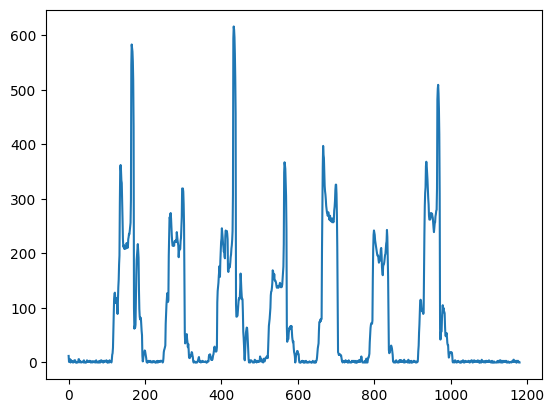

In [4]:
vertical_hist = np.sum(img,axis=0,keepdims=True)
horizontal_hist = np.sum(img,axis=1,keepdims=True)
print(horizontal_hist.shape)
# plot vertical_hist to see the peaks
plt.plot(horizontal_hist.T[0])

In [15]:
from skimage.feature  import *
radius = 3
n_points = 8 * radius
glcm = graycomatrix(rotated,[5],[0])

print(rotated.shape)
print(glcm)
# print(lbp)

ValueError: The levels argument is required for data types other than uint8. The resulting matrix will be at least levels ** 2 in size.

In [8]:
from skimage.measure import find_contours

# install pip install opencv-contrib-python
# sift = cv2.xfeatures2d.SIFT_create()
# keypoints_1, descriptors_1 = sift.detectAndCompute(rotated,None)
# print(keypoints_1, descriptors_1)

sift = cv2.SIFT_create()
kp = sift.detect(rotated,None)
img=cv2.drawKeypoints(rotated,kp,img)
plt.imshow(img)


error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\features2d\src\sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'cv::SIFT_Impl::detectAndCompute'
